In [2]:
import pandas as pd


In [3]:
pip install klib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.3 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv('/Users/razatranjan/Documents/DataScience/Case_Study_LendingLoans/loan.csv', index_col = "id", parse_dates= ['issue_d', 'earliest_cr_line',
     
                                                                                                                                      'last_pymnt_d', 'last_credit_pull_d'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_60845/981480327.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/razatranjan/Documents/DataScience/Case_Study_LendingLoans/loan.csv', index_col = "id", parse_dates= ['issue_d', 'earliest_cr_line',


In [13]:
import klib

In [8]:
df['term_in_months'] = df['term'].apply(lambda x: x.replace(" months", ""))
df.drop(['term'], axis=1, inplace = True)


df['int_rate'] = df['int_rate'].apply(lambda x: x.replace("%", ""))

df['revol_util'] = df['revol_util'].str.replace("%", "")
df['zip_code'] = df['zip_code'].str.replace("x", "")
df['zip_code_3_chars'] = df['zip_code']
df.drop(['zip_code'], axis=1, inplace = True)


df['emp_length'] = df['emp_length'].str.replace("years", "")
df['emp_length'] = df['emp_length'].str.replace("year", "")
df['emp_length'] = df['emp_length'].str.replace(" ", "")

In [9]:
def fun(exp):
    exp_cat = "NA"
    try:
        exp = int(exp)
        if exp >=1 and exp <3:
            exp_cat = "Junior"
        elif exp>=3 and exp<6:
            exp_cat = "Mid"
        elif exp>=6 and exp<=10:
            exp_cat = "High"
    except Exception as e:
        if exp == "10+":
            exp_cat = "Very High"
        elif exp == "<1":
            exp_cat = "Fresher";
    return exp_cat

In [10]:
df['emp_length'] = df['emp_length'].apply(lambda x: fun(x))

In [11]:
df['experience'] = df['emp_length']
df.drop(['emp_length'], axis=1, inplace = True)

In [14]:
df_clean = klib.data_cleaning(df, convert_dtypes=False)

Shape of cleaned data: (39717, 48) - Remaining NAs: 42063


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 62
     of which 6 single valued.     Columns: ['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']
Dropped missing values: 2220226
Reduced memory by at least: 20.1 MB (-58.03%)



In [355]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [15]:
df = df_clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [16]:
df['int_rate'] = df['int_rate'].astype('float64')


In [17]:
df['grade'] = df['grade'].astype('category')
df['sub_grade'] = df['sub_grade'].astype('category')
df['emp_title'] = df['emp_title'].astype('string')
df['home_ownership'] = df['home_ownership'].astype('category')
df['verification_status'] = df['verification_status'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')

df['url'] = df['url'].astype('string')
df['desc'] = df['desc'].astype('string')

df['purpose'] = df['purpose'].astype('category')

In [18]:
df['title'] = df['title'].astype('string')
df['addr_state'] = df['addr_state'].astype('category')
df['zip_code_3_chars'] = df['zip_code_3_chars'].astype('category')
df['experience'] = df['experience'].astype('category')
df['term_in_months'] = df['term_in_months'].astype('int32')
df['delinq_2yrs'] = df['delinq_2yrs'].astype('int8')
df['inq_last_6mths'] = df['delinq_2yrs'].astype('int8')
df['open_acc'] = df['open_acc'].astype('int8')
df['pub_rec'] = df['pub_rec'].astype('int8')
df['total_acc'] = df['total_acc'].astype('int8')
df['tax_liens'] = df['tax_liens'].astype('float32')
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].astype('float32')
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].astype('float32')
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('float32')

df['collection_recovery_fee'] = df['collection_recovery_fee'].astype('float32')
df['total_rec_late_fee'] = df['total_rec_late_fee'].astype('float32')
df['out_prncp'] = df['out_prncp'].astype('float32')
df['out_prncp_inv'] = df['out_prncp_inv'].astype('float32')
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].astype('float32')
df['dti'] = df['dti'].astype('float32')
df['installment'] = df['installment'].astype('float32')

df['member_id'] = df['member_id'].astype('int32')
df['loan_amnt'] = df['loan_amnt'].astype('int32')
df['funded_amnt'] = df['funded_amnt'].astype('int32')    
        

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   member_id                   39717 non-null  int32   
 1   loan_amnt                   39717 non-null  int32   
 2   funded_amnt                 39717 non-null  int32   
 3   funded_amnt_inv             39717 non-null  float64 
 4   int_rate                    39717 non-null  float64 
 5   installment                 39020 non-null  float32 
 6   grade                       39717 non-null  category
 7   sub_grade                   39717 non-null  category
 8   emp_title                   37258 non-null  string  
 9   home_ownership              39717 non-null  category
 10  annual_inc                  39717 non-null  float64 
 11  verification_status         39717 non-null  category
 12  issue_d                     39717 non-null  object  
 13  loan_status     

In [378]:
df.to_csv('loan_refined.csv')

In [29]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: get_valid_dates(x))

In [28]:
def get_valid_dates(d):
    try:
        d_year = int(d[d.index("-")+1:])
        current_year = pd.Timestamp.today().year%100

        if d_year > current_year :
            year = "19"+ str(d[d.index("-")+1:])
        else:
            year = "20"+ str(d[d.index("-")+1:])
    
        d = d[:d.index("-")+1:] + str(year)
    except Exception as e :
        return d;
    return d;

In [31]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'] ,format='%b-%Y')

In [32]:
df['earliest_cr_line']

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 39717, dtype: datetime64[ns]

In [35]:
df['earliest_cr_line'].get(0) > df['earliest_cr_line'].get(39713)

False

In [37]:
df['issue_d'] = df['issue_d'].apply(lambda x: get_valid_dates(x))
df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda x: get_valid_dates(x))
df['last_credit_pull_d'] = df['last_credit_pull_d'].apply(lambda x: get_valid_dates(x))

df['issue_d'] = pd.to_datetime(df['issue_d'] ,format='%b-%Y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'] ,format='%b-%Y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'] ,format='%b-%Y')


In [52]:
df.to_csv('loan_refined_latest.csv')

In [53]:
charged_off_loans = df.groupby('loan_status').get_group('Charged Off')

In [66]:
grade_counts = charged_off_loans['grade'].value_counts(normalize=True)*100

<Axes: xlabel='Grades', ylabel='Loan Charged Off %'>

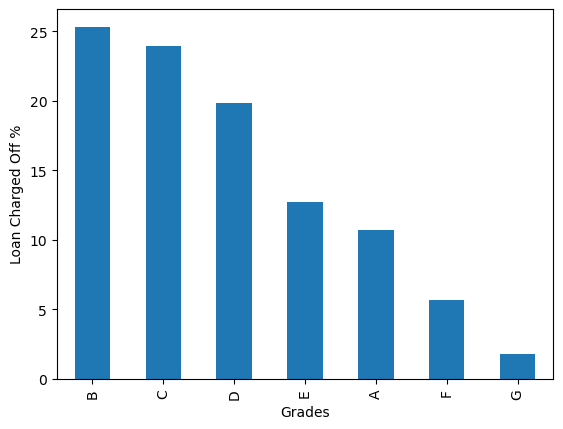

In [167]:
grade_counts.plot(kind='bar', xlabel='Grades', ylabel='Loan Charged Off %')

# Grade B , C and D are doing max charged off . 

In [168]:
sub_grade_counts = charged_off_loans['sub_grade'].value_counts(normalize=True)*100

<Axes: xlabel='SubGrades', ylabel='Loan Charged Off %'>

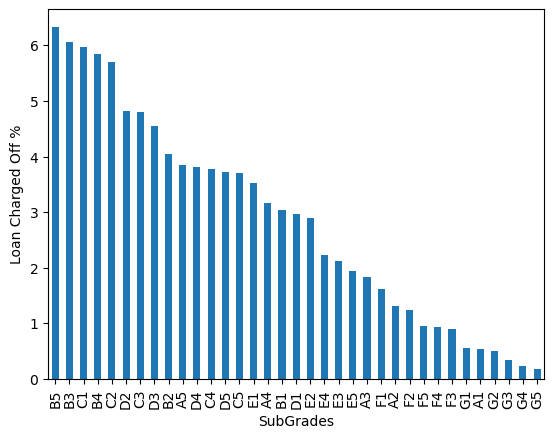

In [169]:
sub_grade_counts.plot(kind='bar', xlabel='SubGrades', ylabel='Loan Charged Off %')

# In Grade B , Subgrade B5 and B3 are doing more charged off

In [62]:
term_counts = charged_off_loans['term_in_months'].value_counts(normalize=True)*100

<Axes: xlabel='term_in_months', ylabel='charged off %'>

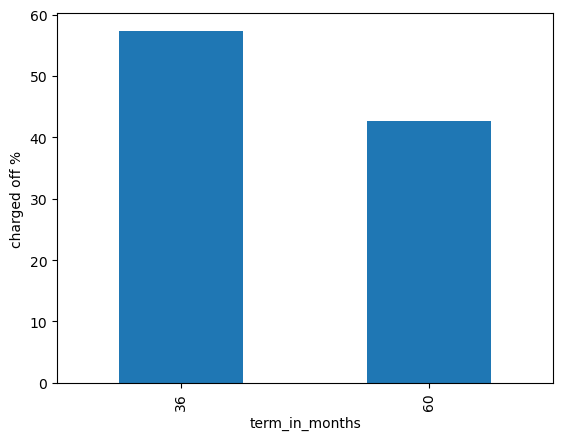

In [129]:
term_counts.plot(kind='bar', xlabel='term_in_months', ylabel='charged off %')

# People who took loan for 36 months are doing more defaults

<Axes: xlabel='home_ownership', ylabel='charged off %'>

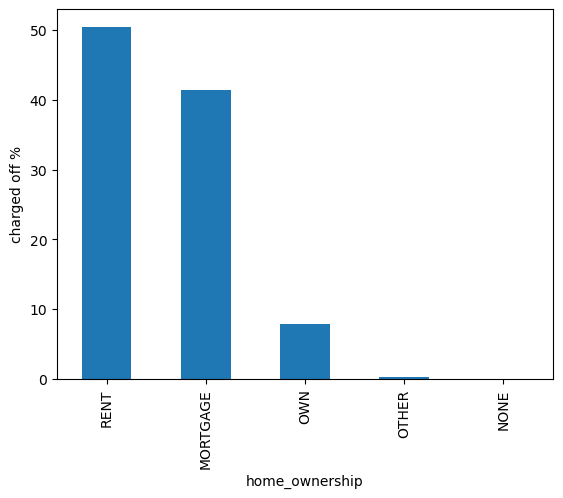

In [130]:
home_ownership_counts = charged_off_loans['home_ownership'].value_counts(normalize=True)*100
home_ownership_counts.plot(kind='bar', xlabel='home_ownership', ylabel='charged off %')

#People who are staying at rent and in mortgage are very high likely for charged off

<Axes: xlabel='purpose', ylabel='Charged off %'>

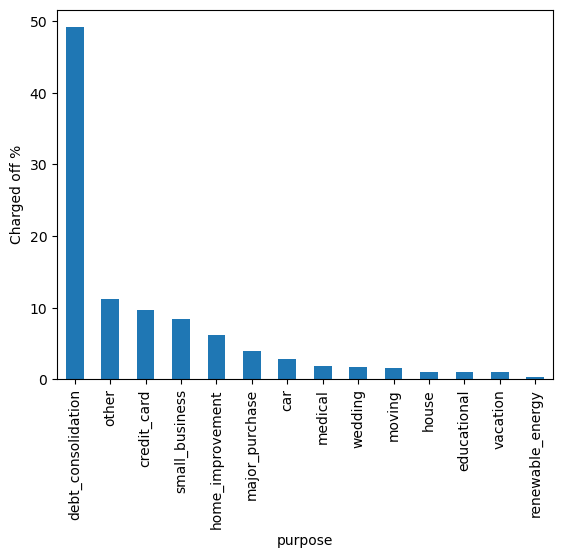

In [134]:
purpose_counts = charged_off_loans['purpose'].value_counts(normalize=True)*100
purpose_counts.plot(kind='bar', xlabel='purpose', ylabel='Charged off %')

#Someone with having purpose for taking loan as debt_consolidation are more likely for charged off  as  percentage is 50%.


<Axes: xlabel='verification_status', ylabel='Charged off %'>

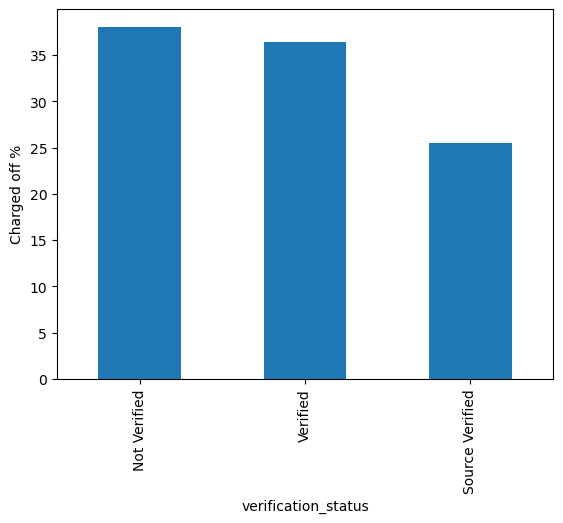

In [135]:
verification_status_counts = charged_off_loans['verification_status'].value_counts(normalize=True)*100
verification_status_counts.plot(kind='bar', xlabel='verification_status', ylabel='Charged off %')

#Persons with having not verified and verified have almost same percentage of charged off but not verified are still more 
# So , Better to be verified and source verified



<Axes: xlabel='addr_state', ylabel='Charged off %'>

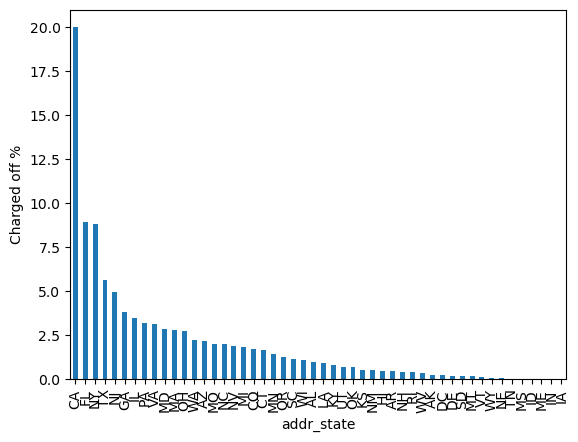

In [136]:
addr_state_counts = charged_off_loans['addr_state'].value_counts(normalize=True)*100
addr_state_counts.plot(kind='bar', xlabel='addr_state', ylabel='Charged off %')

#Address State CA are having more chances of defaulters

<Axes: xlabel='zip_code_3_chars', ylabel='frequency %'>

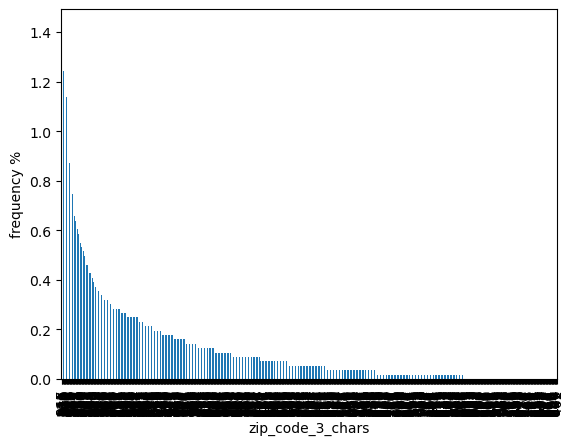

In [84]:
zip_code_3_chars_counts = charged_off_loans['zip_code_3_chars'].value_counts(normalize=True)*100
zip_code_3_chars_counts.plot(kind='bar', xlabel='zip_code_3_chars', ylabel='frequency %')

#Zip_code doesn't have an significant impact on charged off

<Axes: xlabel='experience level', ylabel='Charged off %'>

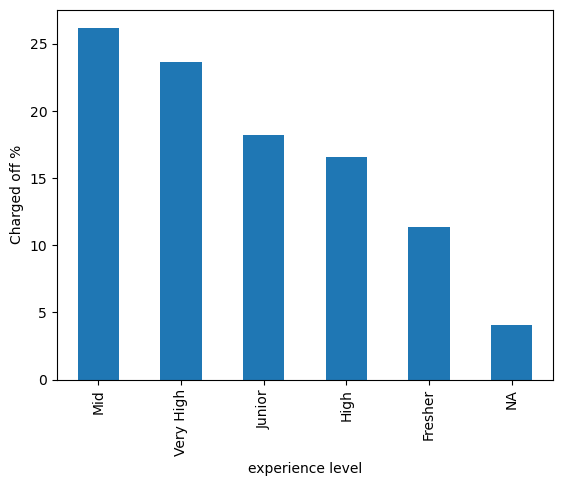

In [137]:
experience_counts = charged_off_loans['experience'].value_counts(normalize=True)*100
experience_counts.plot(kind='bar', xlabel='experience level', ylabel='Charged off %')

#Mid level experience and high level experience are doing more defaults than rest.
#Mid level experienced people are doing charged off max i.e someone having experience 3 and 6 years

<Axes: xlabel='title', ylabel='frequency %'>

/Users/razatranjan/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
/Users/razatranjan/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 153 (\x99) missing from current font.
  func(*args, **kwargs)
/Users/razatranjan/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/razatranjan/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


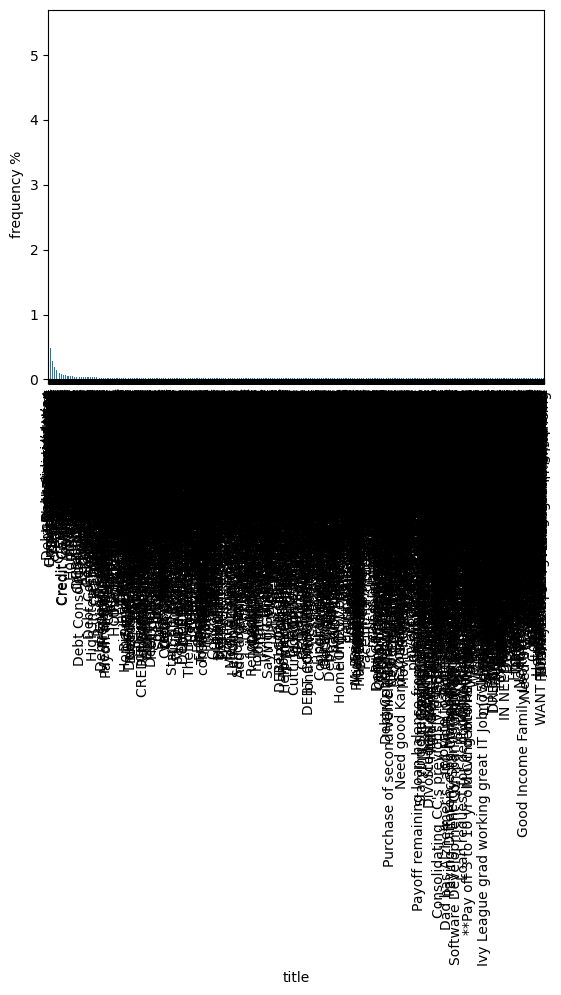

In [88]:
title_counts = charged_off_loans['title'].value_counts(normalize=True)*100
title_counts.plot(kind='bar', xlabel='title', ylabel='frequency %')


#No relationship with title

/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_60845/2376094105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['issue_date_year'] = charged_off_loans['issue_d'].dt.year


<Axes: xlabel='issue_date year', ylabel='Charged Off %'>

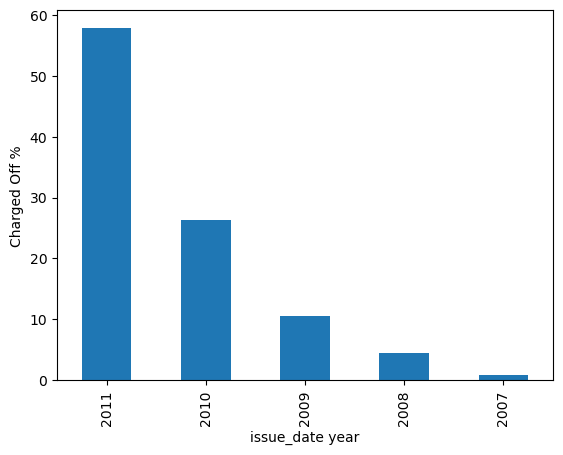

In [139]:
charged_off_loans['issue_date_year'] = charged_off_loans['issue_d'].dt.year
charged_off_loans['issue_date_year']

issue_date_year_counts = charged_off_loans['issue_date_year'].value_counts(normalize=True)*100
issue_date_year_counts.plot(kind='bar', xlabel='issue_date year', ylabel='Charged Off %')

# 2011 Loans issued got more charged off but from here we couldn't find any patters for the future requests for 
#loan candidates

/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_60845/4129458466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['issue_date_month'] = charged_off_loans['issue_d'].dt.month


<Axes: xlabel='issue_date month', ylabel='Charged Off %'>

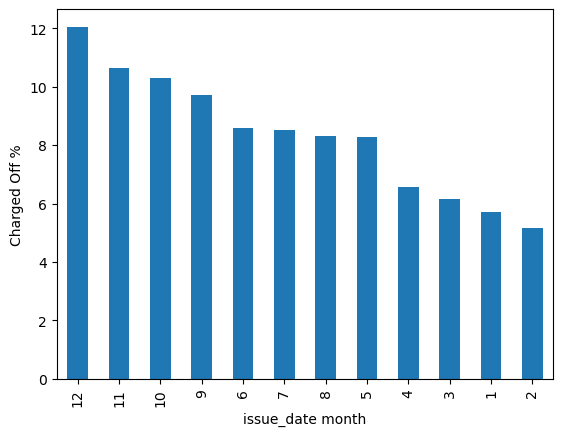

In [140]:
charged_off_loans['issue_date_month'] = charged_off_loans['issue_d'].dt.month
charged_off_loans['issue_date_month']

issue_date_month_counts = charged_off_loans['issue_date_month'].value_counts(normalize=True)*100
issue_date_month_counts.plot(kind='bar', xlabel='issue_date month', ylabel='Charged Off %')

#From this plot we can observe that loans which got issued during end of the year i.e Quarter 4 got more charged off .


<Axes: xlabel='delinq_2yrs', ylabel='Charged Off %'>

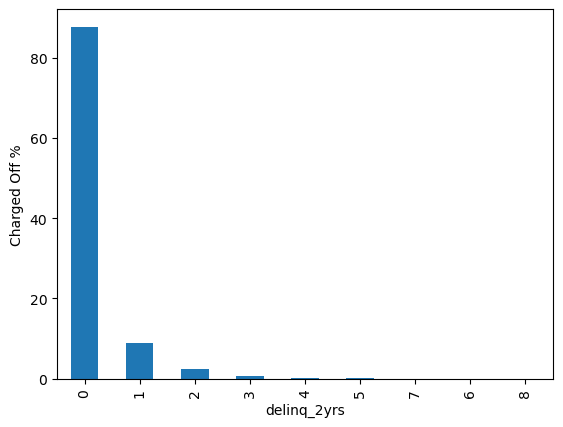

In [253]:
# charged_off_loans['issue_date_year'] = charged_off_loans['issue_d'].dt.year
# charged_off_loans['issue_date_year']

delinq_2yrs_counts = charged_off_loans['delinq_2yrs'].value_counts(normalize=True)*100
delinq_2yrs_counts.plot(kind='bar', xlabel='delinq_2yrs', ylabel='Charged Off %')

# People who have 0 delinquency for 2 years did more charged off .

In [111]:
charged_off_loans['loan_amnt'].describe()

# Difference between 75% and 25% loan_amount gives sense of spread of data 
#i.e 10900 and 10000 is median . Approx 10000 is the amount people took loan and charged off. 

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: ylabel='Frequency'>

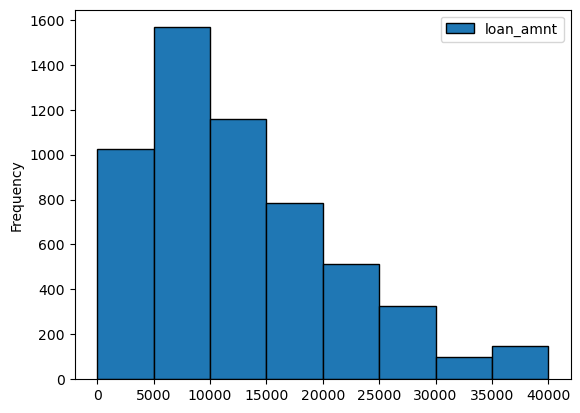

In [166]:
charged_off_loans.plot.hist(column=['loan_amnt'], edgecolor='black', bins=[0,5000,10000, 15000, 20000, 25000, 30000, 35000,40000])



In [123]:
# From Histogram also we can see in range of 5000-1000 max people who took loan charged off .

charged_off_loans['loan_amount_range'] = pd.cut(x=charged_off_loans['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])

charged_off_loans['loan_amount_range']




/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_60845/1200734749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['loan_amount_range'] = pd.cut(x=charged_off_loans['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])


1             (0, 5000]
8         (5000, 10000]
9         (5000, 10000]
12        (5000, 10000]
14        (5000, 10000]
              ...      
39667         (0, 5000]
39668         (0, 5000]
39669     (5000, 10000]
39678         (0, 5000]
39688    (15000, 20000]
Name: loan_amount_range, Length: 5627, dtype: category
Categories (8, interval[int64, right]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000] < (25000, 30000] < (30000, 35000] < (35000, 40000]]

<Axes: xlabel='Loan Amount', ylabel='Loan Charged Off %'>

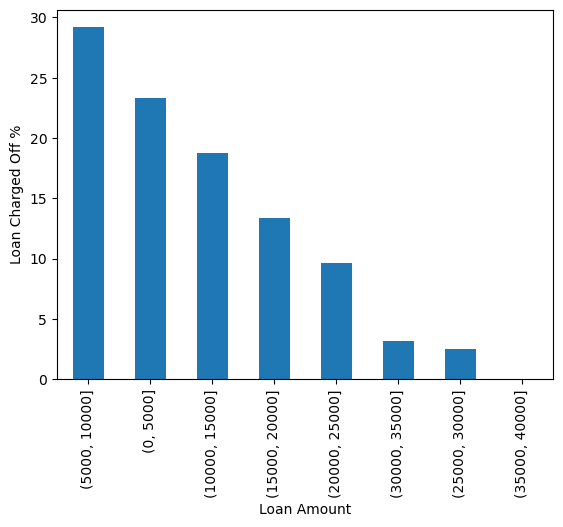

In [257]:

loan_amount_ranges_freq = charged_off_loans['loan_amount_range'].value_counts(normalize=True)*100
loan_amount_ranges_freq.plot(kind='bar', xlabel='Loan Amount', ylabel='Loan Charged Off %')

# people taking loans of amount in range 5000-10000 did more charged off .

<Axes: xlabel='inq_last_6mths', ylabel='Loan Charged Off %'>

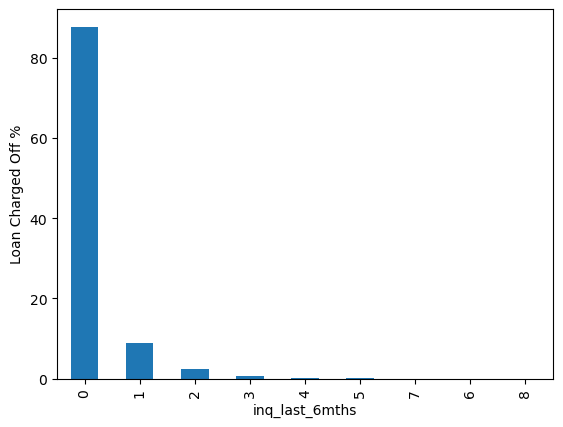

In [148]:
inq_last_6mths_counts = charged_off_loans['inq_last_6mths'].value_counts(normalize=True)*100
inq_last_6mths_counts.plot(kind='bar', xlabel='inq_last_6mths', ylabel='Loan Charged Off %')

# People who doesn't enquire in last 6 months have chargedoff around 90%

In [145]:
charged_off_loans['url_domains'] = charged_off_loans['url'].apply(lambda x: x[: x.index("/browse")])

# url_domains Not a good attribute for analysis

/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_60845/2319284365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['url_domains'] = charged_off_loans['url'].apply(lambda x: x[: x.index("/browse")])


In [147]:
charged_off_loans['url_domains'].unique()

array(['https://lendingclub.com'], dtype=object)

In [153]:
#Annual Income

charged_off_loans['annual_inc'].describe()

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [159]:
# handling the outliers
Q1 = charged_off_loans['annual_inc'].quantile(0.25)
Q3 = charged_off_loans['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [160]:
print(lower)
print(upper)

-20000.0
132000.0


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_60845/3998841527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['annual_inc_range'] = pd.cut(x=charged_off_loans['annual_inc'], bins=range(0, 150000, 30000))


<Axes: xlabel='Annual Income Range', ylabel='Loan Charged Off %'>

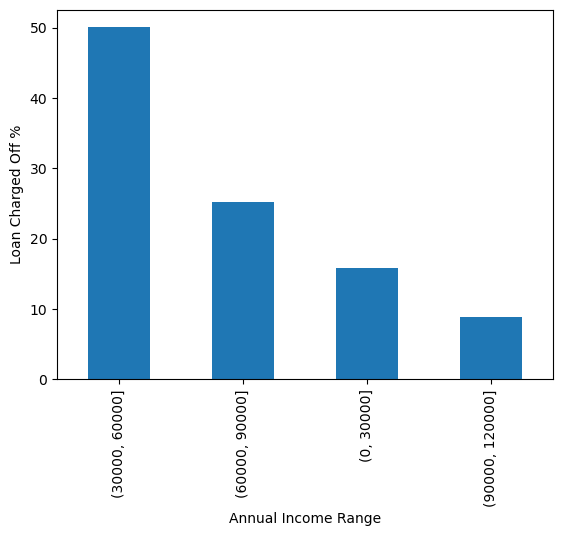

In [174]:
charged_off_loans['annual_inc_range'] = pd.cut(x=charged_off_loans['annual_inc'], bins=range(0, 150000, 30000))

charged_off_loans[['annual_inc','annual_inc_range']]

annual_income_ranges_freq = charged_off_loans['annual_inc_range'].value_counts(normalize=True)*100
annual_income_ranges_freq.plot(kind='bar', xlabel='Annual Income Range', ylabel='Loan Charged Off %')


# We can analyze that people in range of 30-60k are doing 50% charged off . Or We can say annual income below 50k are doing 70% charged off .
#So, Annual Income is an important paramter for the charged off .



<Axes: xlabel='Public Records', ylabel='Loan Charged Off %'>

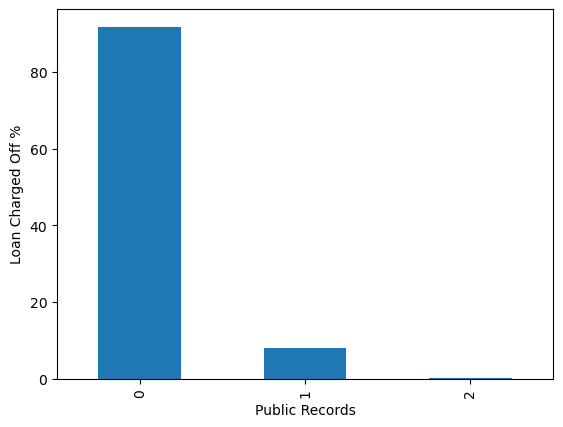

In [175]:
# Pub_rec

pub_rec_counts = charged_off_loans['pub_rec'].value_counts(normalize=True)*100
pub_rec_counts.plot(kind='bar', xlabel='Public Records', ylabel='Loan Charged Off %')

# One who doesn't have derogatory public records are doing > 90% charged off

Text(0, 0.5, 'Charged Off')

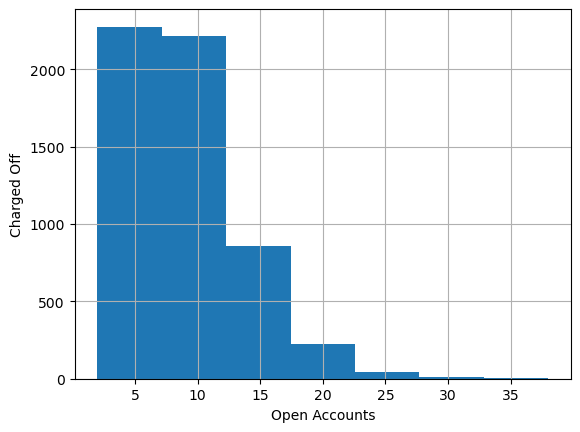

In [190]:
#Open Accounts
plt = charged_off_loans['open_acc'].hist(bins=7)
plt.set_xlabel("Open Accounts")
plt.set_ylabel("Charged Off")

# People have open account in range of 1-12 are doing more charged off

In [192]:
# Revol Balanace

charged_off_loans['revol_bal'].describe()

count      5627.000000
mean      13514.243647
std       15164.117475
min           0.000000
25%        3968.000000
50%        9211.000000
75%       17518.000000
max      148829.000000
Name: revol_bal, dtype: float64

In [194]:
# handling the outliers
Q1 = charged_off_loans['revol_bal'].quantile(0.25)
Q3 = charged_off_loans['revol_bal'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-16357.0
37843.0


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_60845/3494582598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['revol_bal_range'] = pd.cut(x=charged_off_loans['revol_bal'], bins=range(0, 40000, 4000))


<Axes: xlabel='Rev Balance Range', ylabel='Loan Charged Off %'>

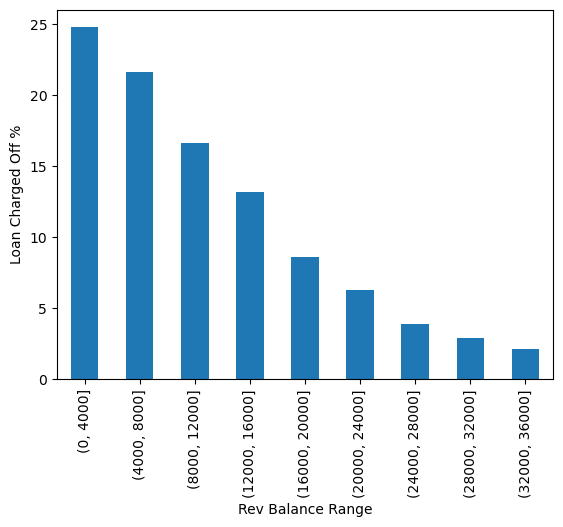

In [195]:
# Range of 0 to 40000 
#Median is  9211


charged_off_loans['revol_bal_range'] = pd.cut(x=charged_off_loans['revol_bal'], bins=range(0, 40000, 4000))

charged_off_loans[['revol_bal','revol_bal_range']]

revol_bal_range_freq = charged_off_loans['revol_bal_range'].value_counts(normalize=True)*100
revol_bal_range_freq.plot(kind='bar', xlabel='Rev Balance Range', ylabel='Loan Charged Off %')


# As Revol Balance increases , Charged off percent deceases i.e Charged off is more when rev balance is low i.e 
# in range of  0-4000 and 4000-8000


In [199]:
# Total Payment

charged_off_loans['total_pymnt'].describe()

count     5627.000000
mean      6838.030941
std       6615.858854
min          0.000000
25%       2215.575000
50%       4839.000000
75%       9191.705000
max      51745.450000
Name: total_pymnt, dtype: float64

In [200]:
# handling the outliers
Q1 = charged_off_loans['total_pymnt'].quantile(0.25)
Q3 = charged_off_loans['total_pymnt'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-8248.620000000003
19655.900000000005


Text(0, 0.5, 'Charged Off')

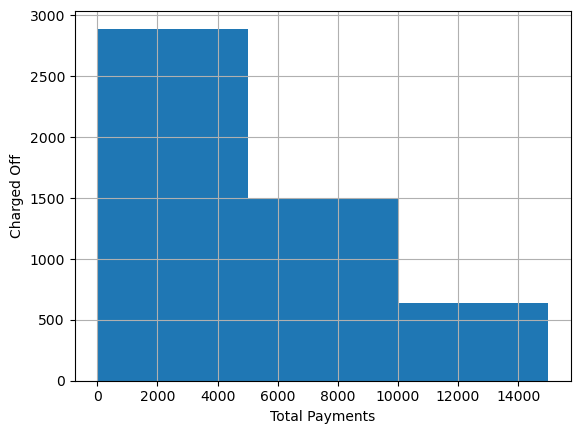

In [201]:
#Total Payments
plt = charged_off_loans['total_pymnt'].hist(bins=range(0,20000, 5000))
plt.set_xlabel("Total Payments")
plt.set_ylabel("Charged Off")

#As Total Payment is increasing charged off  is decreasing . For low total payment (0-5000) charged off is more 

<Axes: xlabel='Public Record BankRuptcies', ylabel='Charged Off%'>

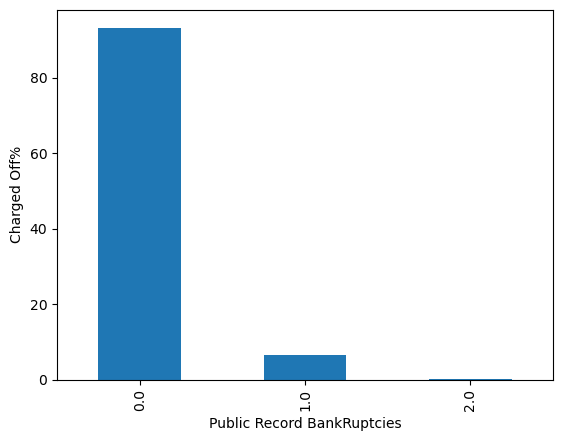

In [206]:
# Public Record Bankruptcies

pub_rec_bankruptcies_counts = charged_off_loans['pub_rec_bankruptcies'].value_counts(normalize=True)*100
pub_rec_bankruptcies_counts.plot(kind='bar', xlabel='Public Record BankRuptcies', ylabel='Charged Off%')

#People who have 0 public record bankruptcies have done the most charged off

In [247]:
charged_off_loans['diff_in_lastpymntandIssueD'] = charged_off_loans['last_pymnt_d'] - charged_off_loans['issue_d']


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_60845/4082458071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['diff_in_lastpymntandIssueD'] = charged_off_loans['last_pymnt_d'] - charged_off_loans['issue_d']


In [239]:
charged_off_loans['diff_in_lastpymntandIssueD']

1       487 days
8       122 days
9       336 days
12      213 days
14      670 days
          ...   
39667   943 days
39668   943 days
39669   550 days
39678   639 days
39688   915 days
Name: diff_in_lastpymntandIssueD, Length: 5627, dtype: timedelta64[ns]

/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_60845/3990582010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['diff_in_lastpymntandIssueD_range'] = pd.cut(x=charged_off_loans['diff_in_lastpymntandIssueD'], bins=15)


<Axes: xlabel='Diff Last Payment and issue Date', ylabel='Loan Charged Off %'>

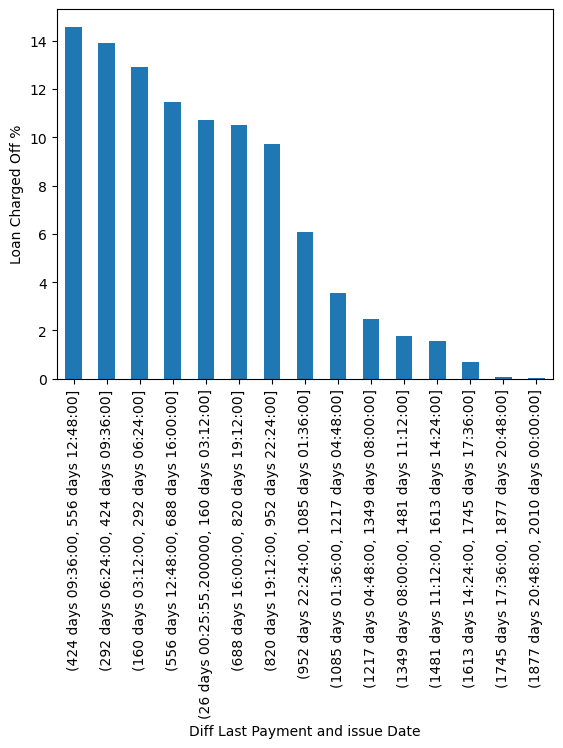

In [251]:
charged_off_loans['diff_in_lastpymntandIssueD_range'] = pd.cut(x=charged_off_loans['diff_in_lastpymntandIssueD'], bins=15)


diff_in_lastpymntandIssueDFreq = charged_off_loans['diff_in_lastpymntandIssueD_range'].value_counts(normalize=True)*100


diff_in_lastpymntandIssueDFreq.plot(kind='bar', xlabel='Diff Last Payment and issue Date', ylabel='Loan Charged Off %')


#We can observe from this that As Last payment is done close to issue date then there is more chances of charged off
# Last payment date is within 2 years of issue date then there is more chances of default .


